In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import cartopy.feature as cfeature
import datetime
import numpy as np 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import seaborn as sns

In [2]:
projection = ccrs.Miller()

In [3]:
point_colors = "blue"

/Users/laura.hayes/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


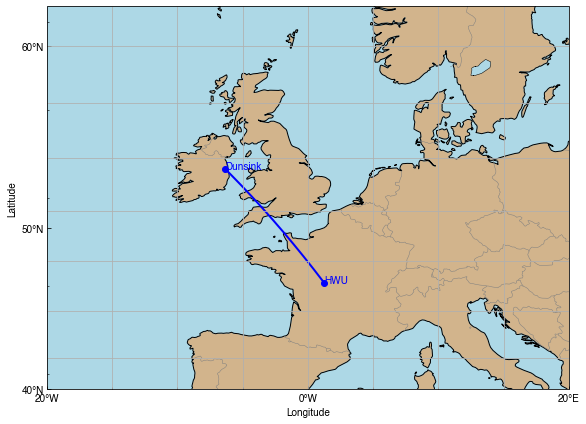

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=projection)

# setting up tick labels etc
ax.set_xticks(np.arange(0, 360,20) , crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines()

# add in features of interest on map
ax.set_extent((-20, 20, 40, 62), crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")
ax.add_feature(cfeature.BORDERS, lw=0.5, color="grey")
ax.add_feature(cfeature.LAND, facecolor="tan")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# hack to allow LAKE feature to have both edgecolor and facecolor
hacked_lake = cfeature.NaturalEarthFeature(cfeature.LAKES.category, cfeature.LAKES.name, cfeature.LAKES.scale, 
                                    edgecolor="k", lw=0.5)
ax.add_feature(hacked_lake, facecolor="lightblue")



# # plot the locations of transmitter/reciever
hwu1_lat, hwu1_lon = 46.714, 1.2443
birr_lon, birr_lat = -6.3375, 53.3871

ax.text(hwu1_lon, hwu1_lat, "HWU", color=point_colors, 
        weight="bold", transform=ccrs.PlateCarree())
ax.text(birr_lon, birr_lat, "Dunsink", color=point_colors, 
        weight="bold", transform=ccrs.PlateCarree())

ax.plot([hwu1_lon, birr_lon], [hwu1_lat, birr_lat],
         color=point_colors, linewidth=2, marker='o',
         transform=ccrs.Geodetic())


ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()

plt.savefig("vlf_path_map.png")